In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
data = pd.read_csv('loan_data.csv')
data.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0


In [3]:
data_numeric = data.drop(columns=['SEX', 'PAY_METHOD', 'JOB'])
data_numeric.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,TARGET
0,40,6,6,6,0,0,0,4500,0,16,0,3990.0,0,1.52,120,500,0,120,0,0
1,35,9,9,0,0,1,0,3700,0,9,0,160.0,0,2.14,100,800,0,0,0,0
2,55,9,9,0,0,0,0,6400,0,1,0,260.0,0,0.50,50,700,0,0,0,0
3,55,42,0,42,0,5,0,8900,0,13,30,1990.0,0,2.61,80,900,0,0,0,0
4,40,36,36,36,0,3,1,0,0,2,0,160.0,0,2.11,10,900,0,0,1,0


In [4]:
print(data.isnull().mean())

AGE              0.0
TOT_LOAN         0.0
TOT_LOAN_CRD     0.0
LOAN_BNK         0.0
LOAN_CPT         0.0
CRDT_CNT         0.0
GUARN_CNT        0.0
INCOME           0.0
LOAN_CRD_CNT     0.0
LATE_RATE        0.0
LATE_RATE_1Y     0.0
INS_MON_MAX      0.0
CANCEL_CNT_1Y    0.0
CALL_TIME        0.0
TEL_COST_MON     0.0
MOBILE_PRICE     0.0
SUSP_DAY         0.0
LATE_TEL         0.0
COMB_COMM        0.0
SEX              0.0
PAY_METHOD       0.0
JOB              0.0
TARGET           0.0
dtype: float64


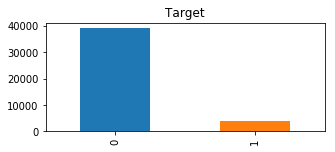

In [5]:
data.TARGET.value_counts().plot.bar(title="Target", figsize=(5,2))

In [6]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);


                    AGE  TOT_LOAN  TOT_LOAN_CRD  LOAN_BNK  LOAN_CPT  CRDT_CNT  \
AGE            1.000000  0.100693      0.049429  0.057704 -0.023392  0.049496   
TOT_LOAN       0.100693  1.000000      0.632357  0.701314  0.116705  0.170974   
TOT_LOAN_CRD   0.049429  0.632357      1.000000  0.270881  0.146111  0.085600   
LOAN_BNK       0.057704  0.701314      0.270881  1.000000 -0.009503  0.193755   
LOAN_CPT      -0.023392  0.116705      0.146111 -0.009503  1.000000  0.114739   
CRDT_CNT       0.049496  0.170974      0.085600  0.193755  0.114739  1.000000   
GUARN_CNT      0.058666  0.134531      0.116401  0.074777  0.054870  0.043878   
INCOME        -0.081809  0.012968      0.002396  0.017675  0.004443  0.030422   
LOAN_CRD_CNT   0.075785 -0.004628     -0.009705 -0.011940  0.005227  0.014215   
LATE_RATE      0.013287 -0.007837     -0.005303 -0.014524 -0.000476 -0.012764   
LATE_RATE_1Y  -0.064284 -0.029522     -0.010542 -0.026955  0.000123 -0.045928   
INS_MON_MAX    0.026295 -0.0

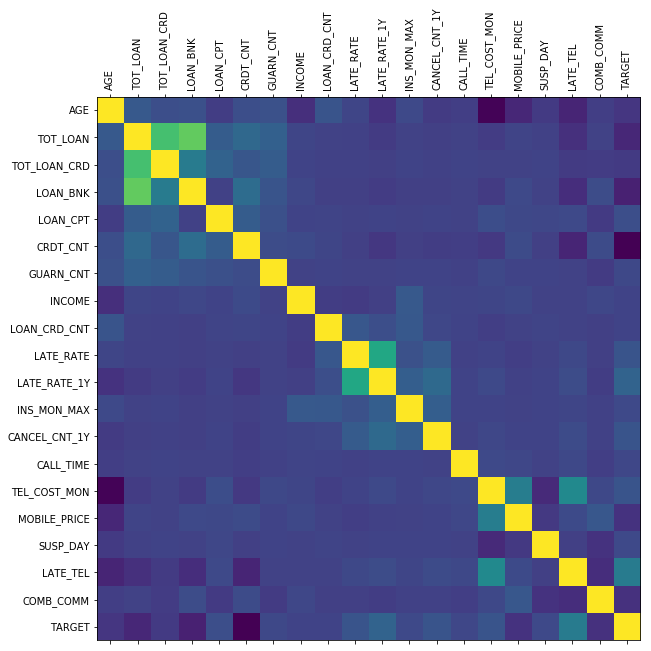

In [7]:
plot_corr(data_numeric)

In [8]:
data_category = data.loc[:,['SEX', 'PAY_METHOD', 'JOB']]
data_category.head()                     

,SEX,PAY_METHOD,JOB
0,M,A,A
1,M,C,B
2,M,C,B
3,M,B,C
4,F,B,B


In [9]:
data_dummies = pd.get_dummies(data_category, columns=['SEX', 'PAY_METHOD', 'JOB'])
data_dummies.head()

,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,0,1,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0,0


                 SEX_F     SEX_M  PAY_METHOD_A  PAY_METHOD_B  PAY_METHOD_C  \
SEX_F         1.000000 -1.000000      0.010039     -0.020075      0.005875   
SEX_M        -1.000000  1.000000     -0.010039      0.020075     -0.005875   
PAY_METHOD_A  0.010039 -0.010039      1.000000     -0.171992     -0.293127   
PAY_METHOD_B -0.020075  0.020075     -0.171992      1.000000     -0.808369   
PAY_METHOD_C  0.005875 -0.005875     -0.293127     -0.808369      1.000000   
PAY_METHOD_D  0.020974 -0.020974     -0.051077     -0.140857     -0.240063   
JOB_A        -0.002869  0.002869     -0.006487     -0.005052      0.007412   
JOB_B        -0.005237  0.005237     -0.004191      0.004201      0.001890   
JOB_C         0.008520 -0.008520     -0.000021     -0.014023      0.010707   
JOB_D        -0.002471  0.002471      0.013577      0.021131     -0.028486   

              PAY_METHOD_D     JOB_A     JOB_B     JOB_C     JOB_D  
SEX_F             0.020974 -0.002869 -0.005237  0.008520 -0.002471  
SEX

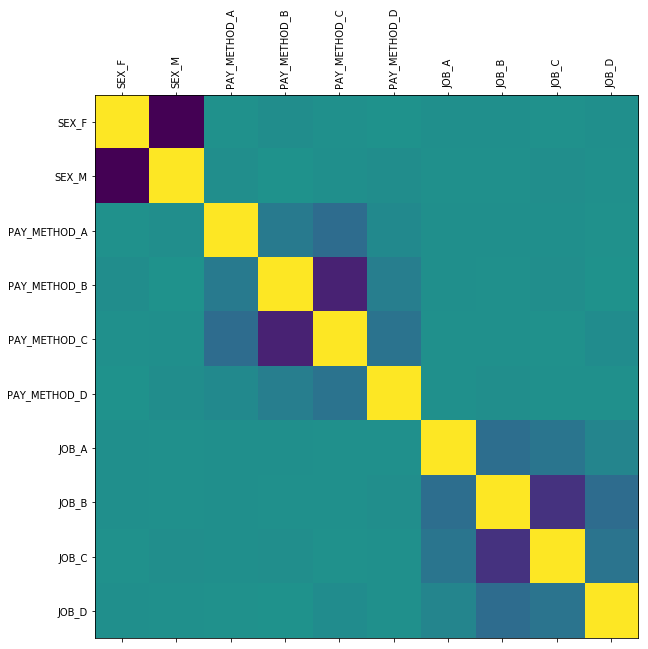

In [10]:
plot_corr(data_dummies)

In [11]:
data_total = pd.concat((data_numeric,data_dummies), axis=1)
data_x = data_total.drop(columns=['TARGET'])
data_y = data.TARGET

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                  test_size=0.3,
                                                  shuffle=True,
                                                  random_state=123456)

In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,0.3,0.036217,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.232323,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.3,0.087525,0.000000,0.092161,0.000000,0.272727,0.0,0.50,0.0,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.6,0.006036,0.006036,0.006356,0.000000,0.272727,0.0,0.53,0.0,0.010101,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.7,0.093561,0.018109,0.060381,0.109635,0.090909,0.0,0.00,0.0,0.020202,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.9,0.048290,0.048290,0.028602,0.000000,0.272727,0.1,0.00,0.0,0.161616,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

c:\users\user\appdata\local\conda\conda\envs\hsncml01\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,0.3,0.006036,0.000000,0.000000,0.019934,0.181818,0.0,0.40,0.000000,0.01,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.3,0.196177,0.027163,0.177966,0.089701,0.454545,0.0,0.00,0.090909,0.09,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.5,0.190141,0.190141,0.200212,0.000000,0.272727,0.0,0.32,0.000000,0.00,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.000000,0.000000,0.000000,0.000000,0.363636,0.0,0.47,0.000000,0.02,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.6,0.247485,0.012072,0.092161,0.009967,0.636364,0.0,0.50,0.000000,0.03,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## SVM

In [15]:
for i in range(1,3):
    model = SVC(C=i, gamma=0.01).fit(X_train_scaled, y_train)
    print(i,model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

1 0.9038524860059269 0.9068838352796558
2 0.9038524860059269 0.9068838352796558


In [16]:
for i in range(1,3):
    model = LinearSVC(C=i).fit(X_train_scaled, y_train)
    print(i,model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

1 0.9105037866315443 0.9131837738168408
2 0.9104708594007244 0.9132606023355869


In [17]:
model = LinearSVC(C=2).fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.9104708594007244, 0.9132606023355869)

In [18]:
y_pred = model.predict(X_test_scaled)
LR_cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

Accuracy: 0.9132606023355869 
Precision: 0.636963696369637 
Recall: 0.15924092409240925 
F1_score: 0.2547854785478548


## Random Forest

In [23]:
model = RandomForestClassifier(n_estimators=30, max_depth=20, random_state=111).fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))
y_pred = model.predict(X_test_scaled)
LR_cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

0.9865656898254856 0.9226336816226183
Accuracy: 0.9226336816226183 
Precision: 0.7054108216432866 
Recall: 0.29042904290429045 
F1_score: 0.4114552893045003


([<matplotlib.axis.YTick at 0x1ad920fccc0>,
 <a list of 29 Text yticklabel objects>)

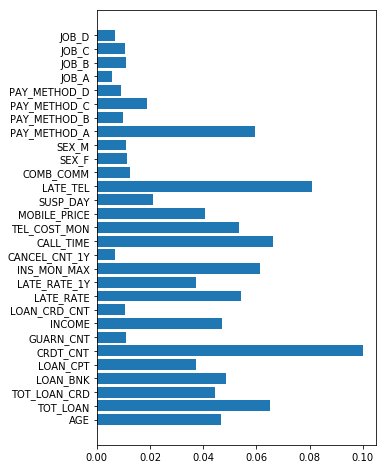

In [24]:
plt.figure(figsize=(5,8))
plt.barh(range(X_train_scaled.shape[1]), model.feature_importances_)
plt.yticks(range(X_train_scaled.shape[1]), X_train_scaled.columns)

## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

0.9228514981890023 0.9244775660725261
Accuracy: 0.9244775660725261 
Precision: 0.6957264957264957 
Recall: 0.3358085808580858 
F1_score: 0.452977184195882


## Imbalance (Linear SVC 로 테스트함)

In [26]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### Under - Tomek Links

In [29]:
tl = TomekLinks(return_indices=True)
X_resampled, y_resampled, idx_resampled = tl.fit_sample(X_train_scaled, y_train)
print(len(X_resampled), len(y_resampled), len(X_train_scaled), len(y_train))
model = LinearSVC(C=2).fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

29740 29740 30370 30370
Accuracy: 0.9147971727105101 
Precision: 0.6223277909738717 
Recall: 0.21617161716171618 
F1_score: 0.32088181261481935


### Under - Condensed Nearest Neighbor(엄청오래걸림 ㄷㄷ)

In [ ]:
cnn = CondensedNearestNeighbour(return_indices=True)
X_resampled, y_resampled, idx_resampled = cnn.fit_sample(X_train_scaled, y_train)
print(len(X_resampled), len(y_resampled), len(X_train_scaled), len(y_train))
model = LinearSVC(C=2).fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

### Under - One-Side Selection

In [30]:
oss = OneSidedSelection(return_indices = True)
X_resampled, y_resampled, idx_resampled = oss.fit_sample(X_train_scaled, y_train)
print(len(X_resampled), len(y_resampled), len(X_train_scaled), len(y_train))
model = LinearSVC(C=2).fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

29650 29650 30370 30370
Accuracy: 0.9147971727105101 
Precision: 0.6223277909738717 
Recall: 0.21617161716171618 
F1_score: 0.32088181261481935


### Over - SMOTE

In [32]:
sm = SMOTE(k_neighbors = 1, kind = 'regular')
X_resampled, y_resampled = sm.fit_sample(X_train_scaled, y_train)
print(len(X_resampled), len(y_resampled), len(X_train_scaled), len(y_train))
model = LinearSVC(C=2).fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

54900 54900 30370 30370
Accuracy: 0.7960971112476951 
Precision: 0.2883147386964181 
Recall: 0.8102310231023102 
F1_score: 0.42529233434387187


### Over - Borderline-SMOTE

In [33]:
sm_bl = SMOTE(k_neighbors = 5, m_neighbors = 5, kind = 'borderline1')
X_resampled, y_resampled = sm_bl.fit_sample(X_train_scaled, y_train)
print(len(X_resampled), len(y_resampled), len(X_train_scaled), len(y_train))
model = LinearSVC(C=2).fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

54900 54900 30370 30370
Accuracy: 0.8080055316533498 
Precision: 0.29833907865872766 
Recall: 0.7854785478547854 
F1_score: 0.4324324324324324


### Over - ADASYN

In [34]:
adas = ADASYN(n_neighbors=3)
X_resampled, y_resampled = adas.fit_sample(X_train_scaled, y_train)
print(len(X_resampled), len(y_resampled), len(X_train_scaled), len(y_train))
model = LinearSVC(C=2).fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

55578 55578 30370 30370
Accuracy: 0.754840196681008 
Precision: 0.25428358579587784 
Recall: 0.8448844884488449 
F1_score: 0.3909142966214927
